## Importing Libraries

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load Dataset

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
display(X.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# 🧪 Use only one feature for simple visualization (optional)
# Example: Median Income (MedInc)
X = X[['MedInc']]
y = y
# ✨ Reshape is not needed for pandas dataframe
# But if X was a NumPy 1D array, you'd do: X = X.reshape(-1, 1)

## Train-Test Split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Feature Scaling

In [16]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # flatten after scaling

## ⚙️ Train SVR Model

In [17]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=100)

## Predict

In [18]:
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

## Evaluation

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 0.730


In [21]:
print(f"R² Score: {r2:.3f}")

R² Score: 0.443


## 🖼️ Plot Results

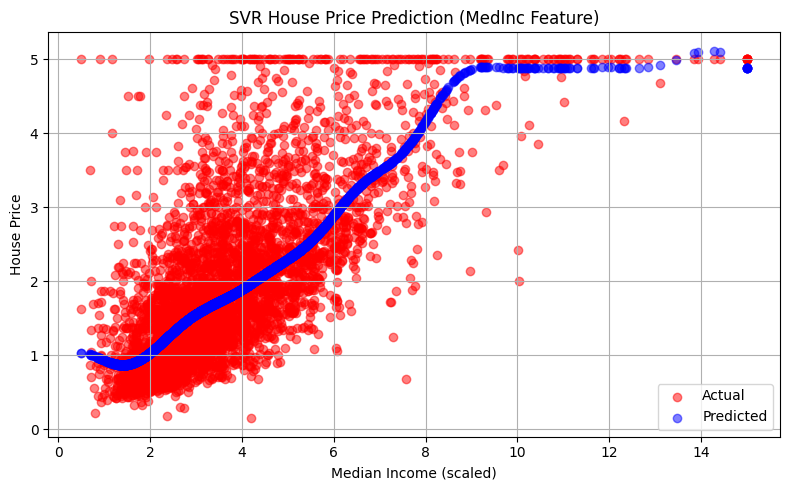

In [23]:
# 🖼️ Plot Results
import os
if not os.path.exists('images'):
    os.makedirs('images')

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred, color='blue', alpha=0.5, label='Predicted')
plt.title('SVR House Price Prediction (MedInc Feature)')
plt.xlabel('Median Income (scaled)')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/result_plot.png')  # Save for GitHub
plt.show()